In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, re
from typing import List, Tuple

NOTEBOOK_PATH = os.getcwd()
INPUT_DIR = os.path.join(NOTEBOOK_PATH, '..', 'data', 'IntermediateData')

INPUT_DIR = os.path.abspath(INPUT_DIR)

faulty = pd.read_csv(os.path.join(INPUT_DIR, 'faulty.csv'))
healthy = pd.read_csv(os.path.join(INPUT_DIR, 'healthy.csv'))
faulty_zip = pd.read_csv(os.path.join(INPUT_DIR, 'faulty_zip.csv'))
healthy_zip = pd.read_csv(os.path.join(INPUT_DIR, 'healthy_zip.csv'))

In [4]:
def plot_experiment(df, type, exp_id):
    fig, ax = plt.subplots(2,1,figsize=(8,8))
    tmp = df[df['Experiment ID'] == exp_id]
    ax[0].plot(tmp['Time (s)'],tmp['CURRENT (A)'])
    ax[0].set_title('Current')
    ax[0].set_ylabel('Current (A)')
    ax[1].plot(tmp['Time (s)'],tmp['ROTO (RPM)'])
    ax[1].set_title('Rotational speed')
    ax[1].set_xlabel('Time (s)')
    ax[1].set_ylabel('Rotational speed (RPM)')

    fig.suptitle(f"{type} Experiment {exp_id}")
    plt.show()

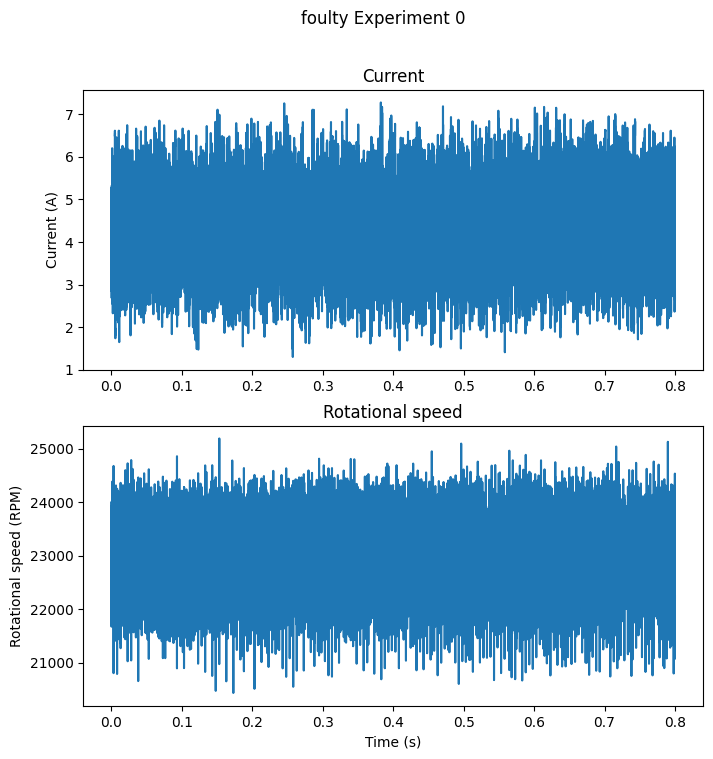

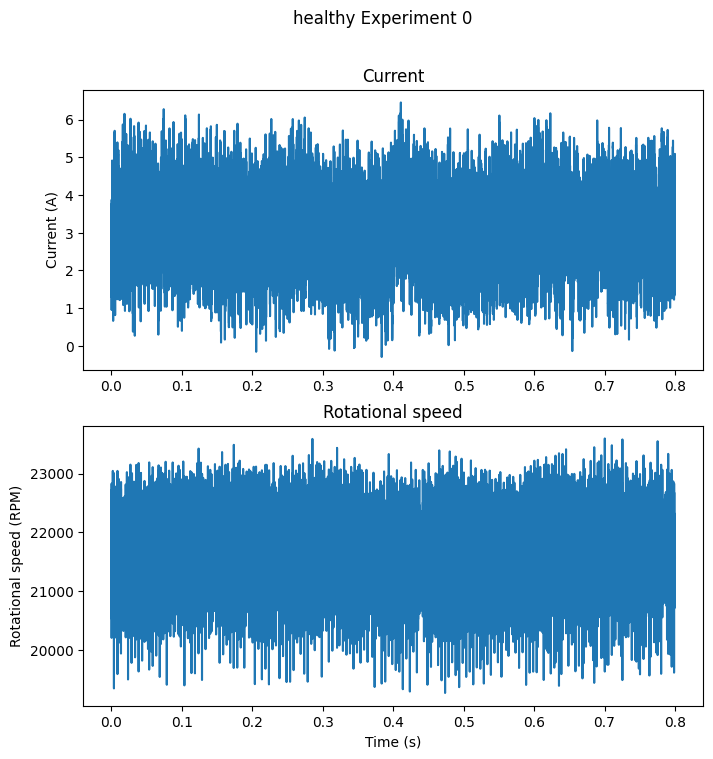

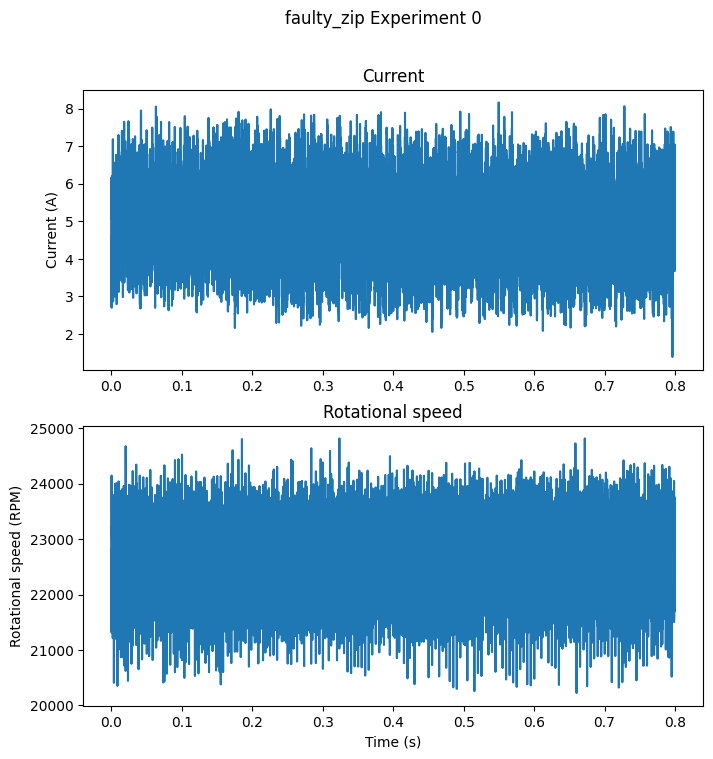

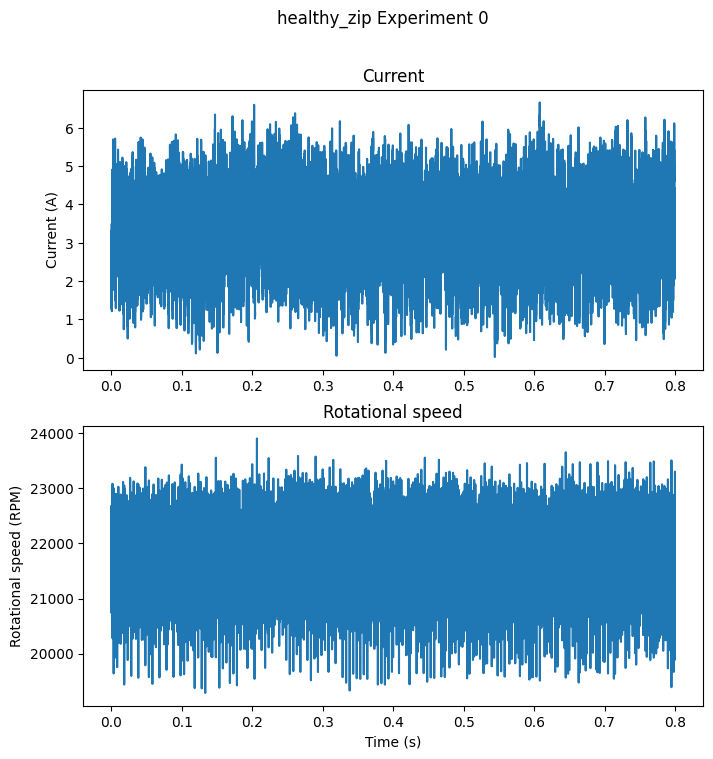

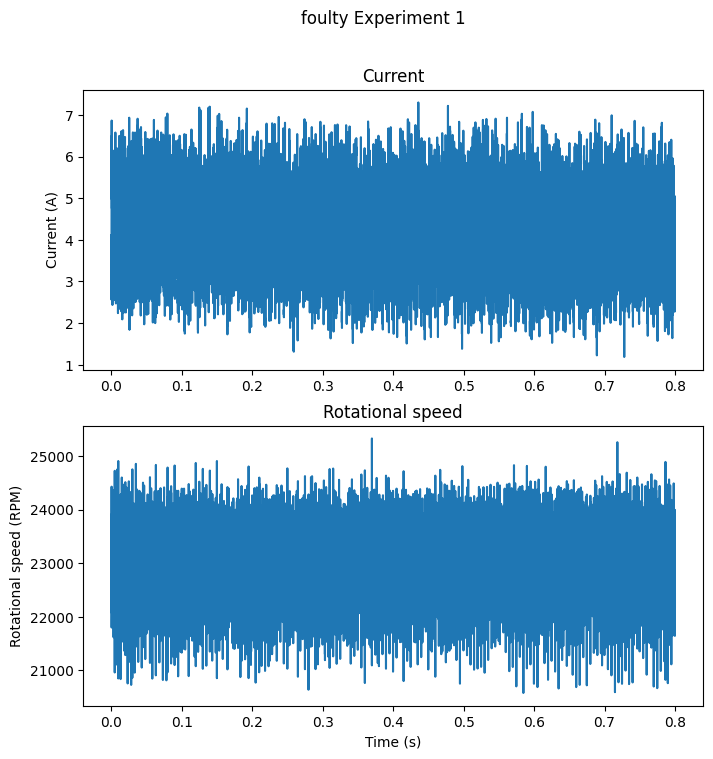

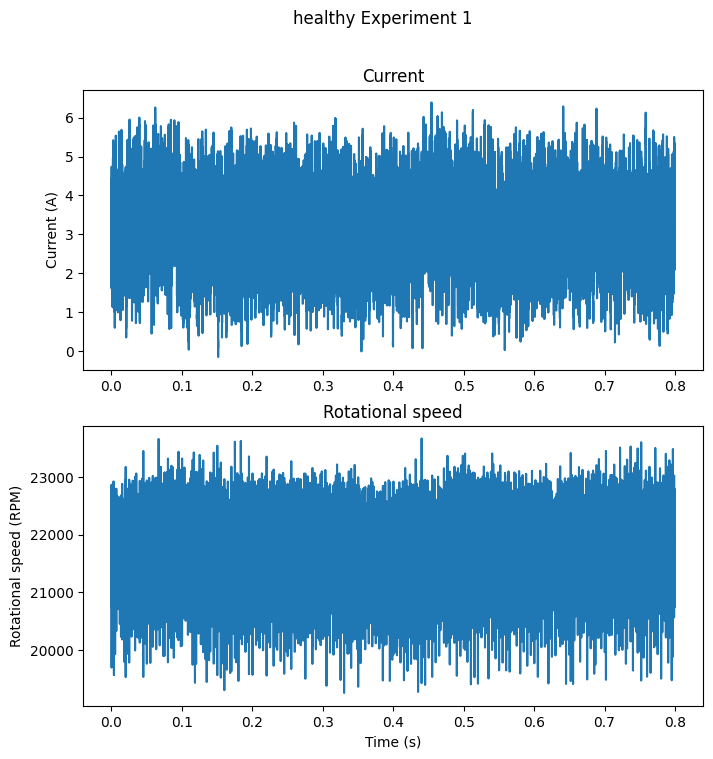

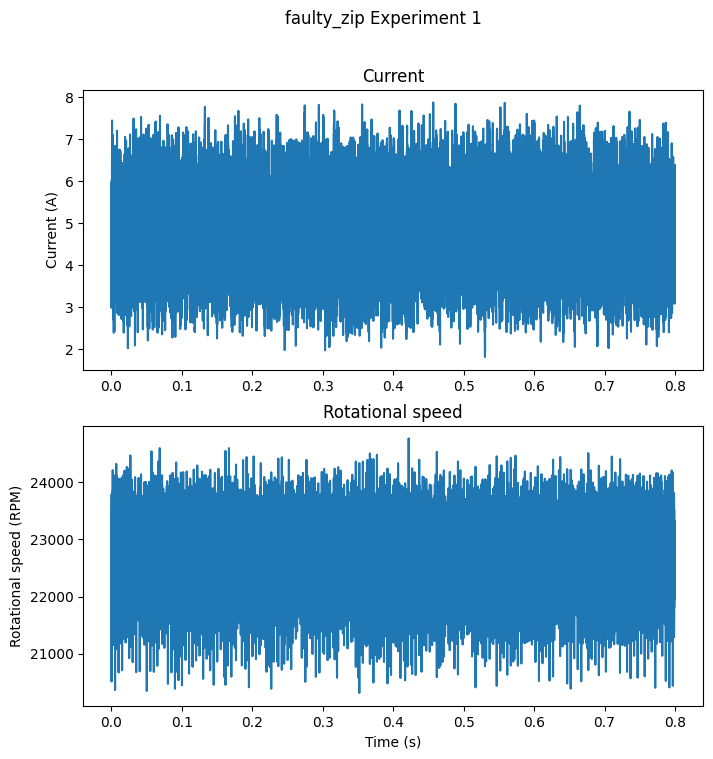

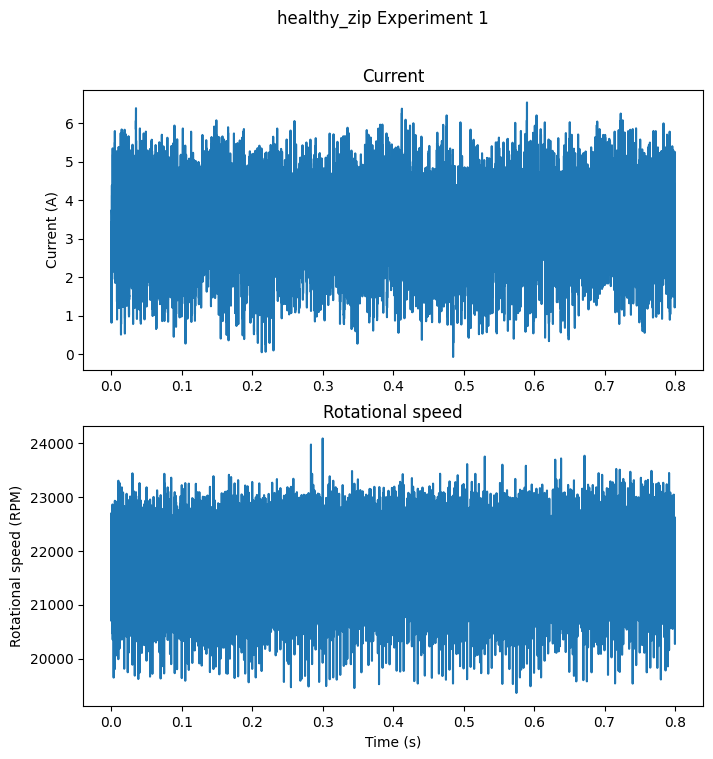

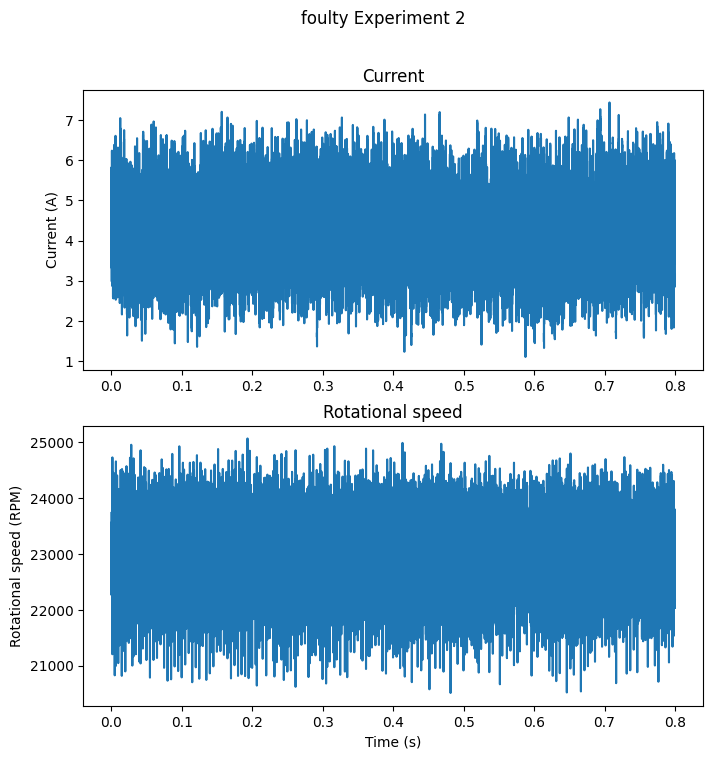

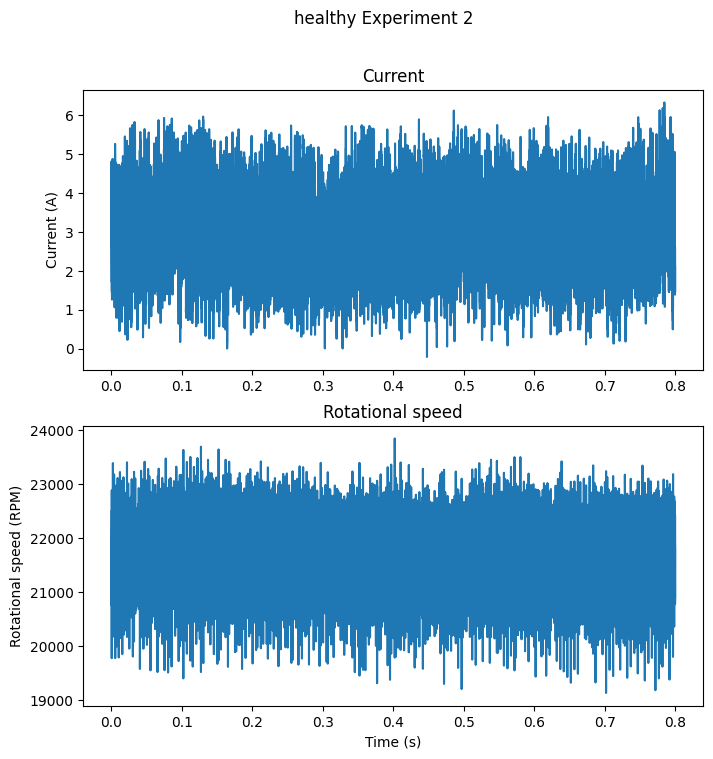

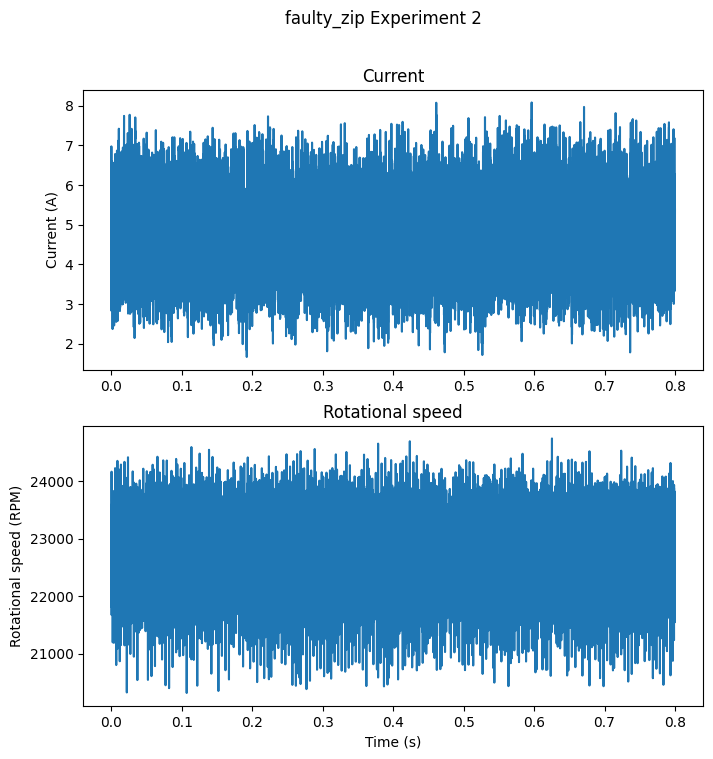

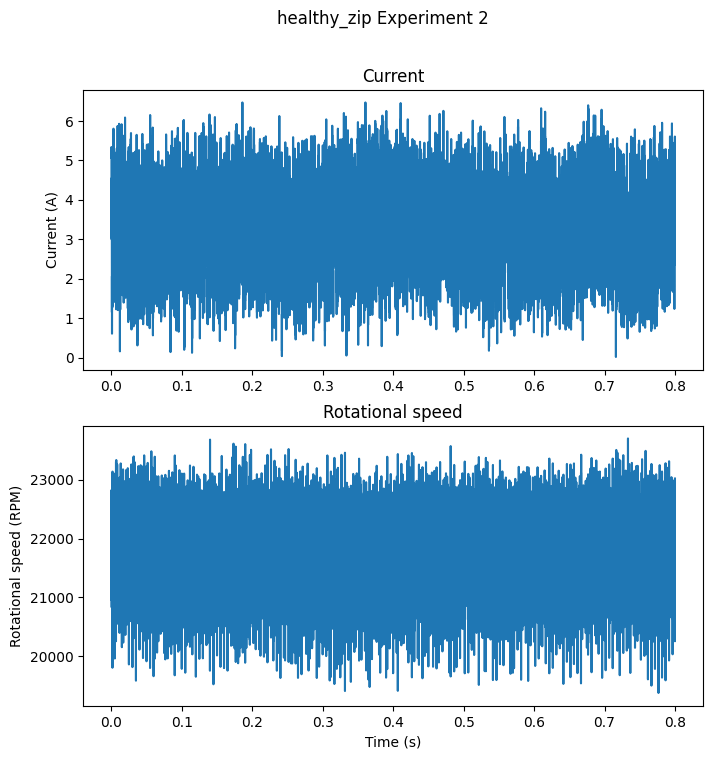

In [5]:

for i in range(3):
    plot_experiment(faulty, "foulty", i)
    plot_experiment(healthy, "healthy", i)
    plot_experiment(faulty_zip, "faulty_zip", i)
    plot_experiment(healthy_zip, "healthy_zip", i)

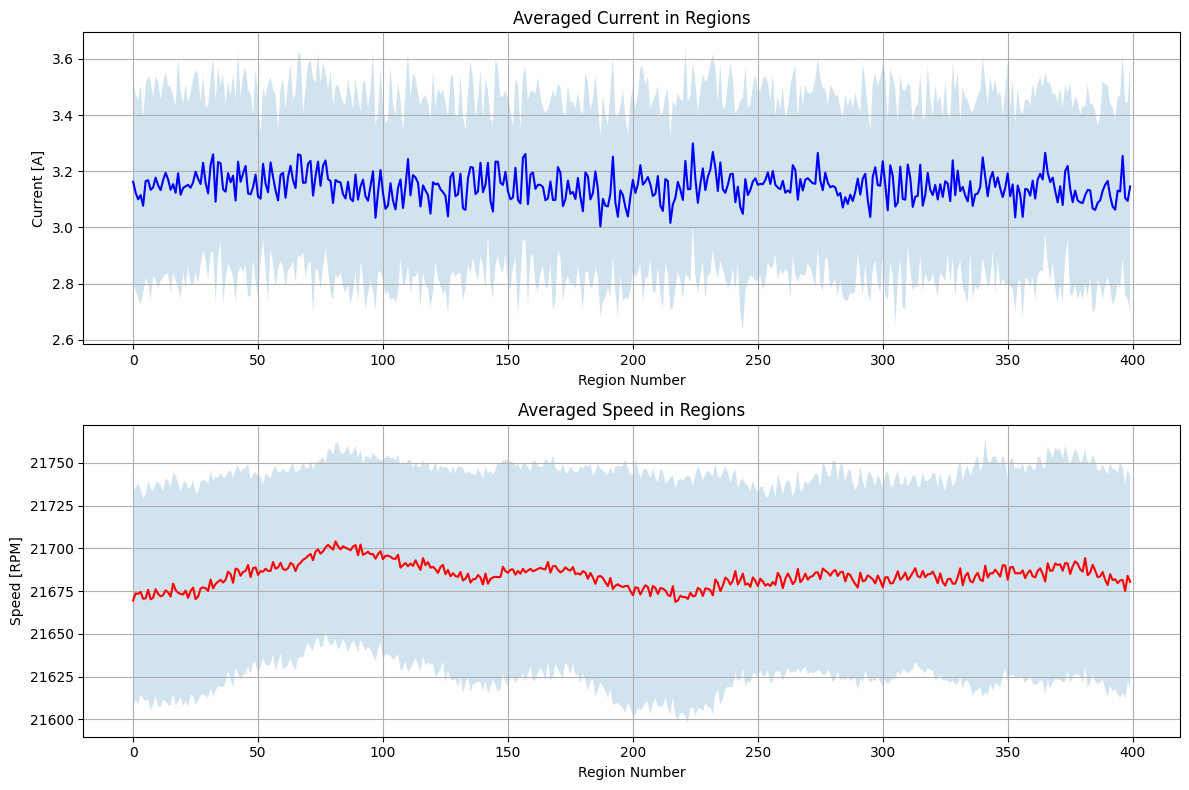

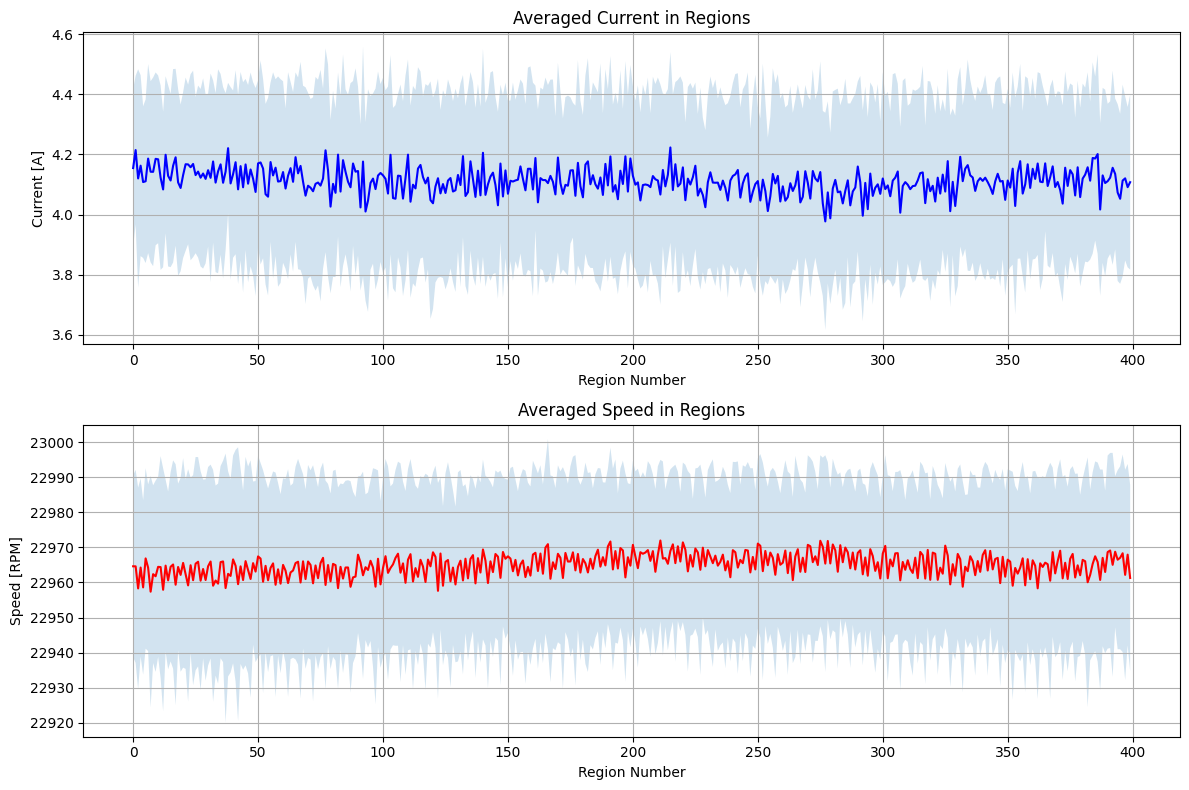

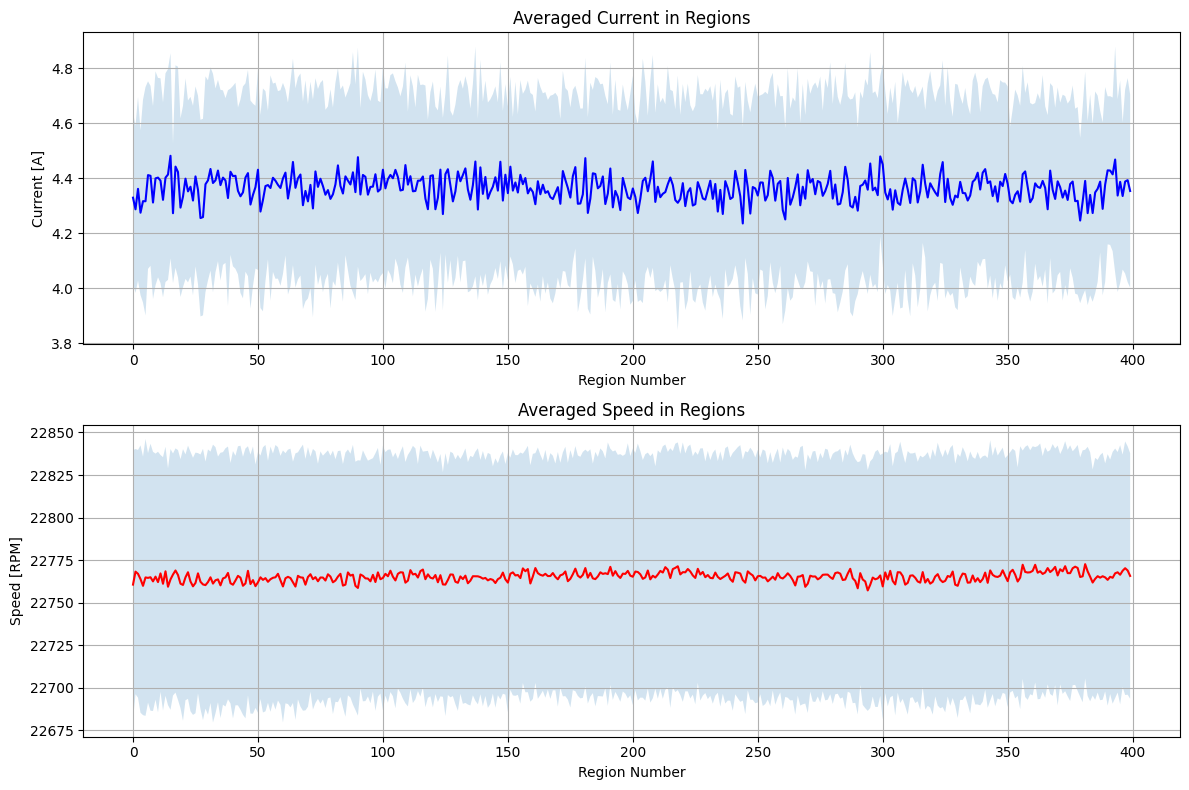

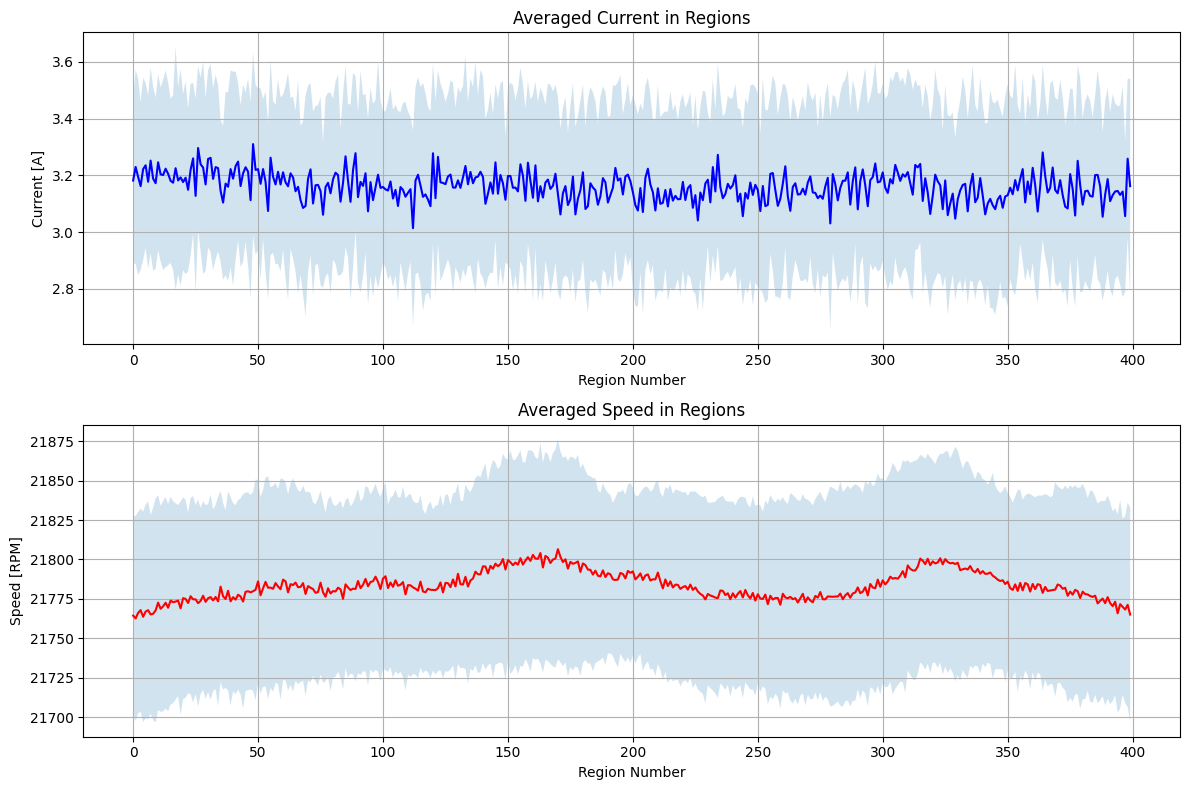

In [14]:
def average_by_regions(data, n_regions=4000):
    # Assuming data is a 1D array with 40000 samples
    samples_per_region = len(data) // n_regions

    # Reshape data into regions and calculate mean for each region
    reshaped_data = data[:n_regions * samples_per_region].reshape(n_regions, samples_per_region)
    averaged_data = np.mean(reshaped_data, axis=1)

    return averaged_data

# Assuming you have data in similar format as in visualize_data.ipynb
def process_experiments(df, n_regions=4000):
    # Find unique experiment IDs
    experiment_ids = df['Experiment ID'].unique()

    # Prepare arrays for averaged data
    averaged_currents = []
    averaged_speeds = []

    for exp_id in experiment_ids:
        # Select data for given experiment
        exp_data = df[df['Experiment ID'] == exp_id]

        # Average current and speed in regions
        avg_current = average_by_regions(exp_data['CURRENT (A)'].values, n_regions)
        avg_speed = average_by_regions(exp_data['ROTO (RPM)'].values, n_regions)

        averaged_currents.append(avg_current)
        averaged_speeds.append(avg_speed)

    # Convert to numpy arrays
    averaged_currents = np.array(averaged_currents)
    averaged_speeds = np.array(averaged_speeds)

    return averaged_currents, averaged_speeds

# Visualization of results
def plot_averaged_results(averaged_currents, averaged_speeds):
    # Calculate mean and standard deviation for all experiments
    mean_current = np.mean(averaged_currents, axis=0)
    std_current = np.std(averaged_currents, axis=0)

    mean_speed = np.mean(averaged_speeds, axis=0)
    std_speed = np.std(averaged_speeds, axis=0)

    # Create plots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # X-axis regions (0 to 3999)
    regions = np.arange(len(mean_current))

    # Current plot
    ax1.plot(regions, mean_current, 'b-', label='Mean Current')
    ax1.fill_between(regions,
                     mean_current - std_current,
                     mean_current + std_current,
                     alpha=0.2)
    ax1.set_title('Averaged Current in Regions')
    ax1.set_xlabel('Region Number')
    ax1.set_ylabel('Current [A]')
    ax1.grid(True)

    # Speed plot
    ax2.plot(regions, mean_speed, 'r-', label='Mean Speed')
    ax2.fill_between(regions,
                     mean_speed - std_speed,
                     mean_speed + std_speed,
                     alpha=0.2)
    ax2.set_title('Averaged Speed in Regions')
    ax2.set_xlabel('Region Number')
    ax2.set_ylabel('Speed [RPM]')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# Usage (assuming you have data loaded into DataFrame)
# df = pd.read_csv('your_file.csv')  # or other data source
averaged_currents, averaged_speeds = process_experiments(healthy, n_regions=400)
plot_averaged_results(averaged_currents, averaged_speeds)

averaged_currents, averaged_speeds = process_experiments(faulty, n_regions=400)
plot_averaged_results(averaged_currents, averaged_speeds)

averaged_currents, averaged_speeds = process_experiments(faulty_zip, n_regions=400)
plot_averaged_results(averaged_currents, averaged_speeds)

averaged_currents, averaged_speeds = process_experiments(healthy_zip, n_regions=400)
plot_averaged_results(averaged_currents, averaged_speeds)